# Random Forest

Dataset Description:

Use the Glass dataset and apply the Random forest model.

1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.


Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler



In [46]:
df = pd.read_excel('glass.xlsx')

In [47]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [49]:
print(df.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [50]:
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


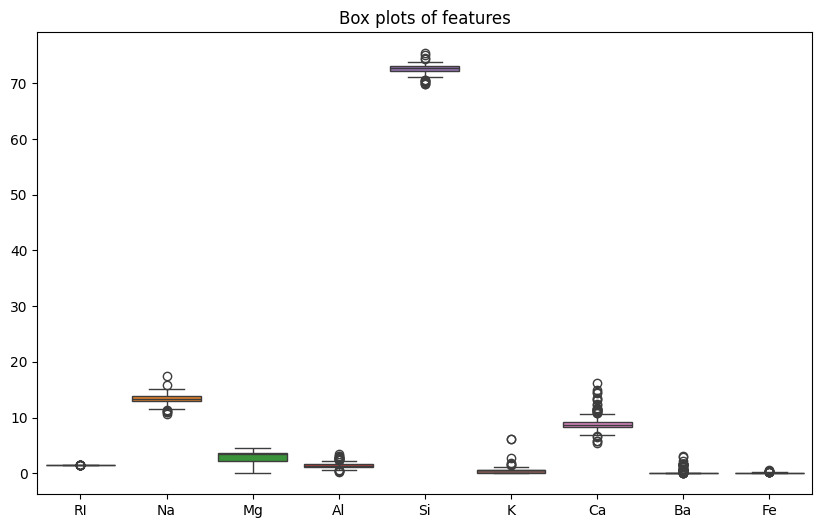

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.iloc[:, :-1])
plt.title('Box plots of features')
plt.show()

In [52]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[mask]

features = df.drop('Type', axis=1)
featuresn = remove_outliers_iqr(features)


dfn = featuresn.copy()
dfn['Type'] = df.loc[featuresn.index, 'Type']


print(f"Original shape: {df.shape}")
print(f"After removing outliers: {dfn.shape}")


Original shape: (214, 10)
After removing outliers: (136, 10)


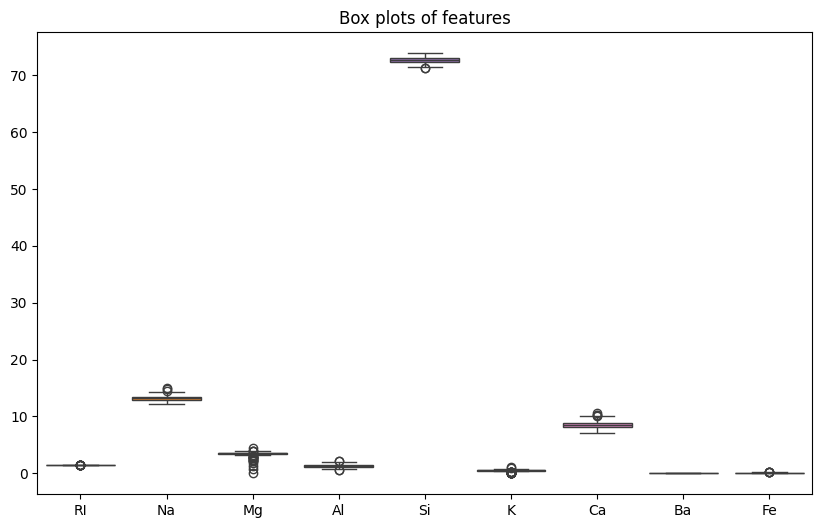

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dfn.iloc[:, :-1])
plt.title('Box plots of features')
plt.show()

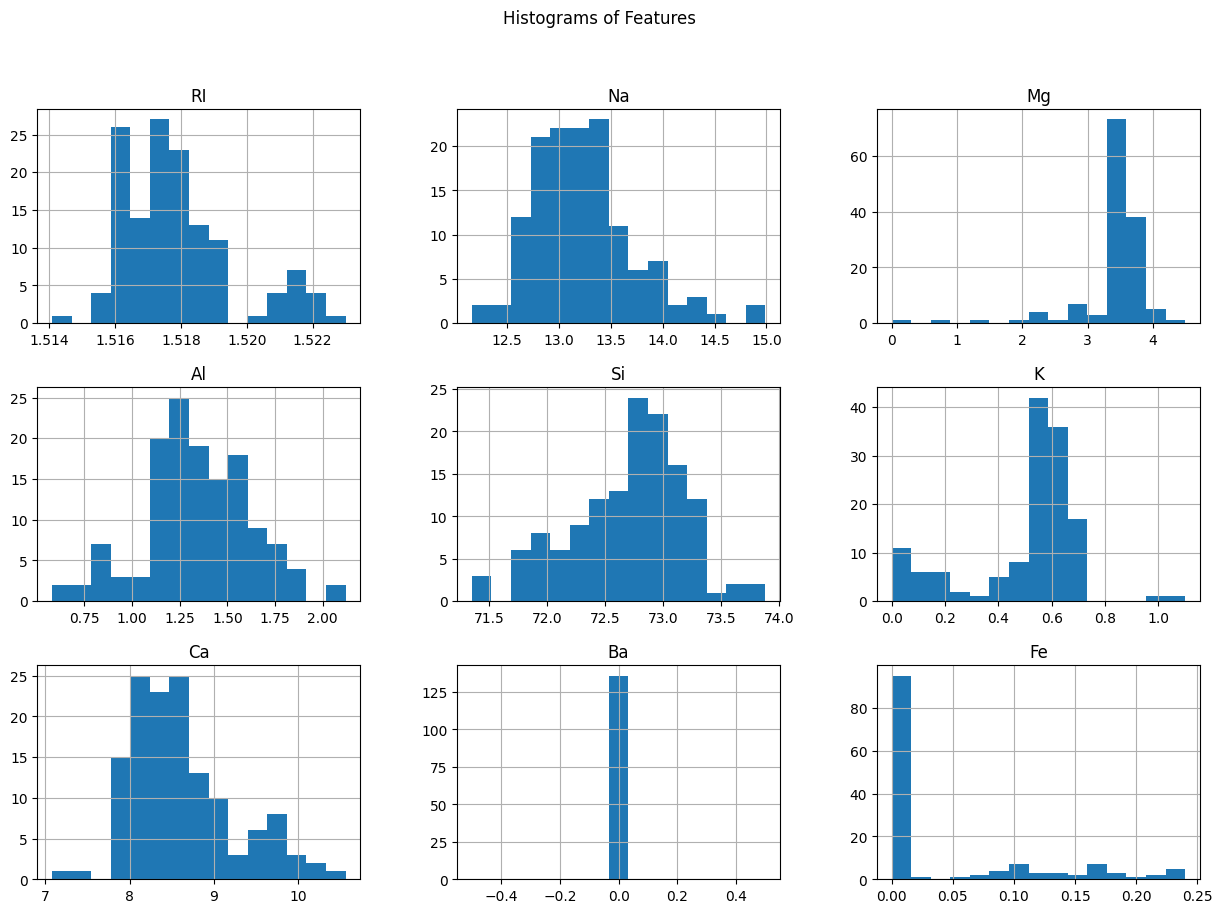

In [54]:
dfn.iloc[:, :-1].hist(bins=15, figsize=(15,10))
plt.suptitle('Histograms of Features')
plt.show()

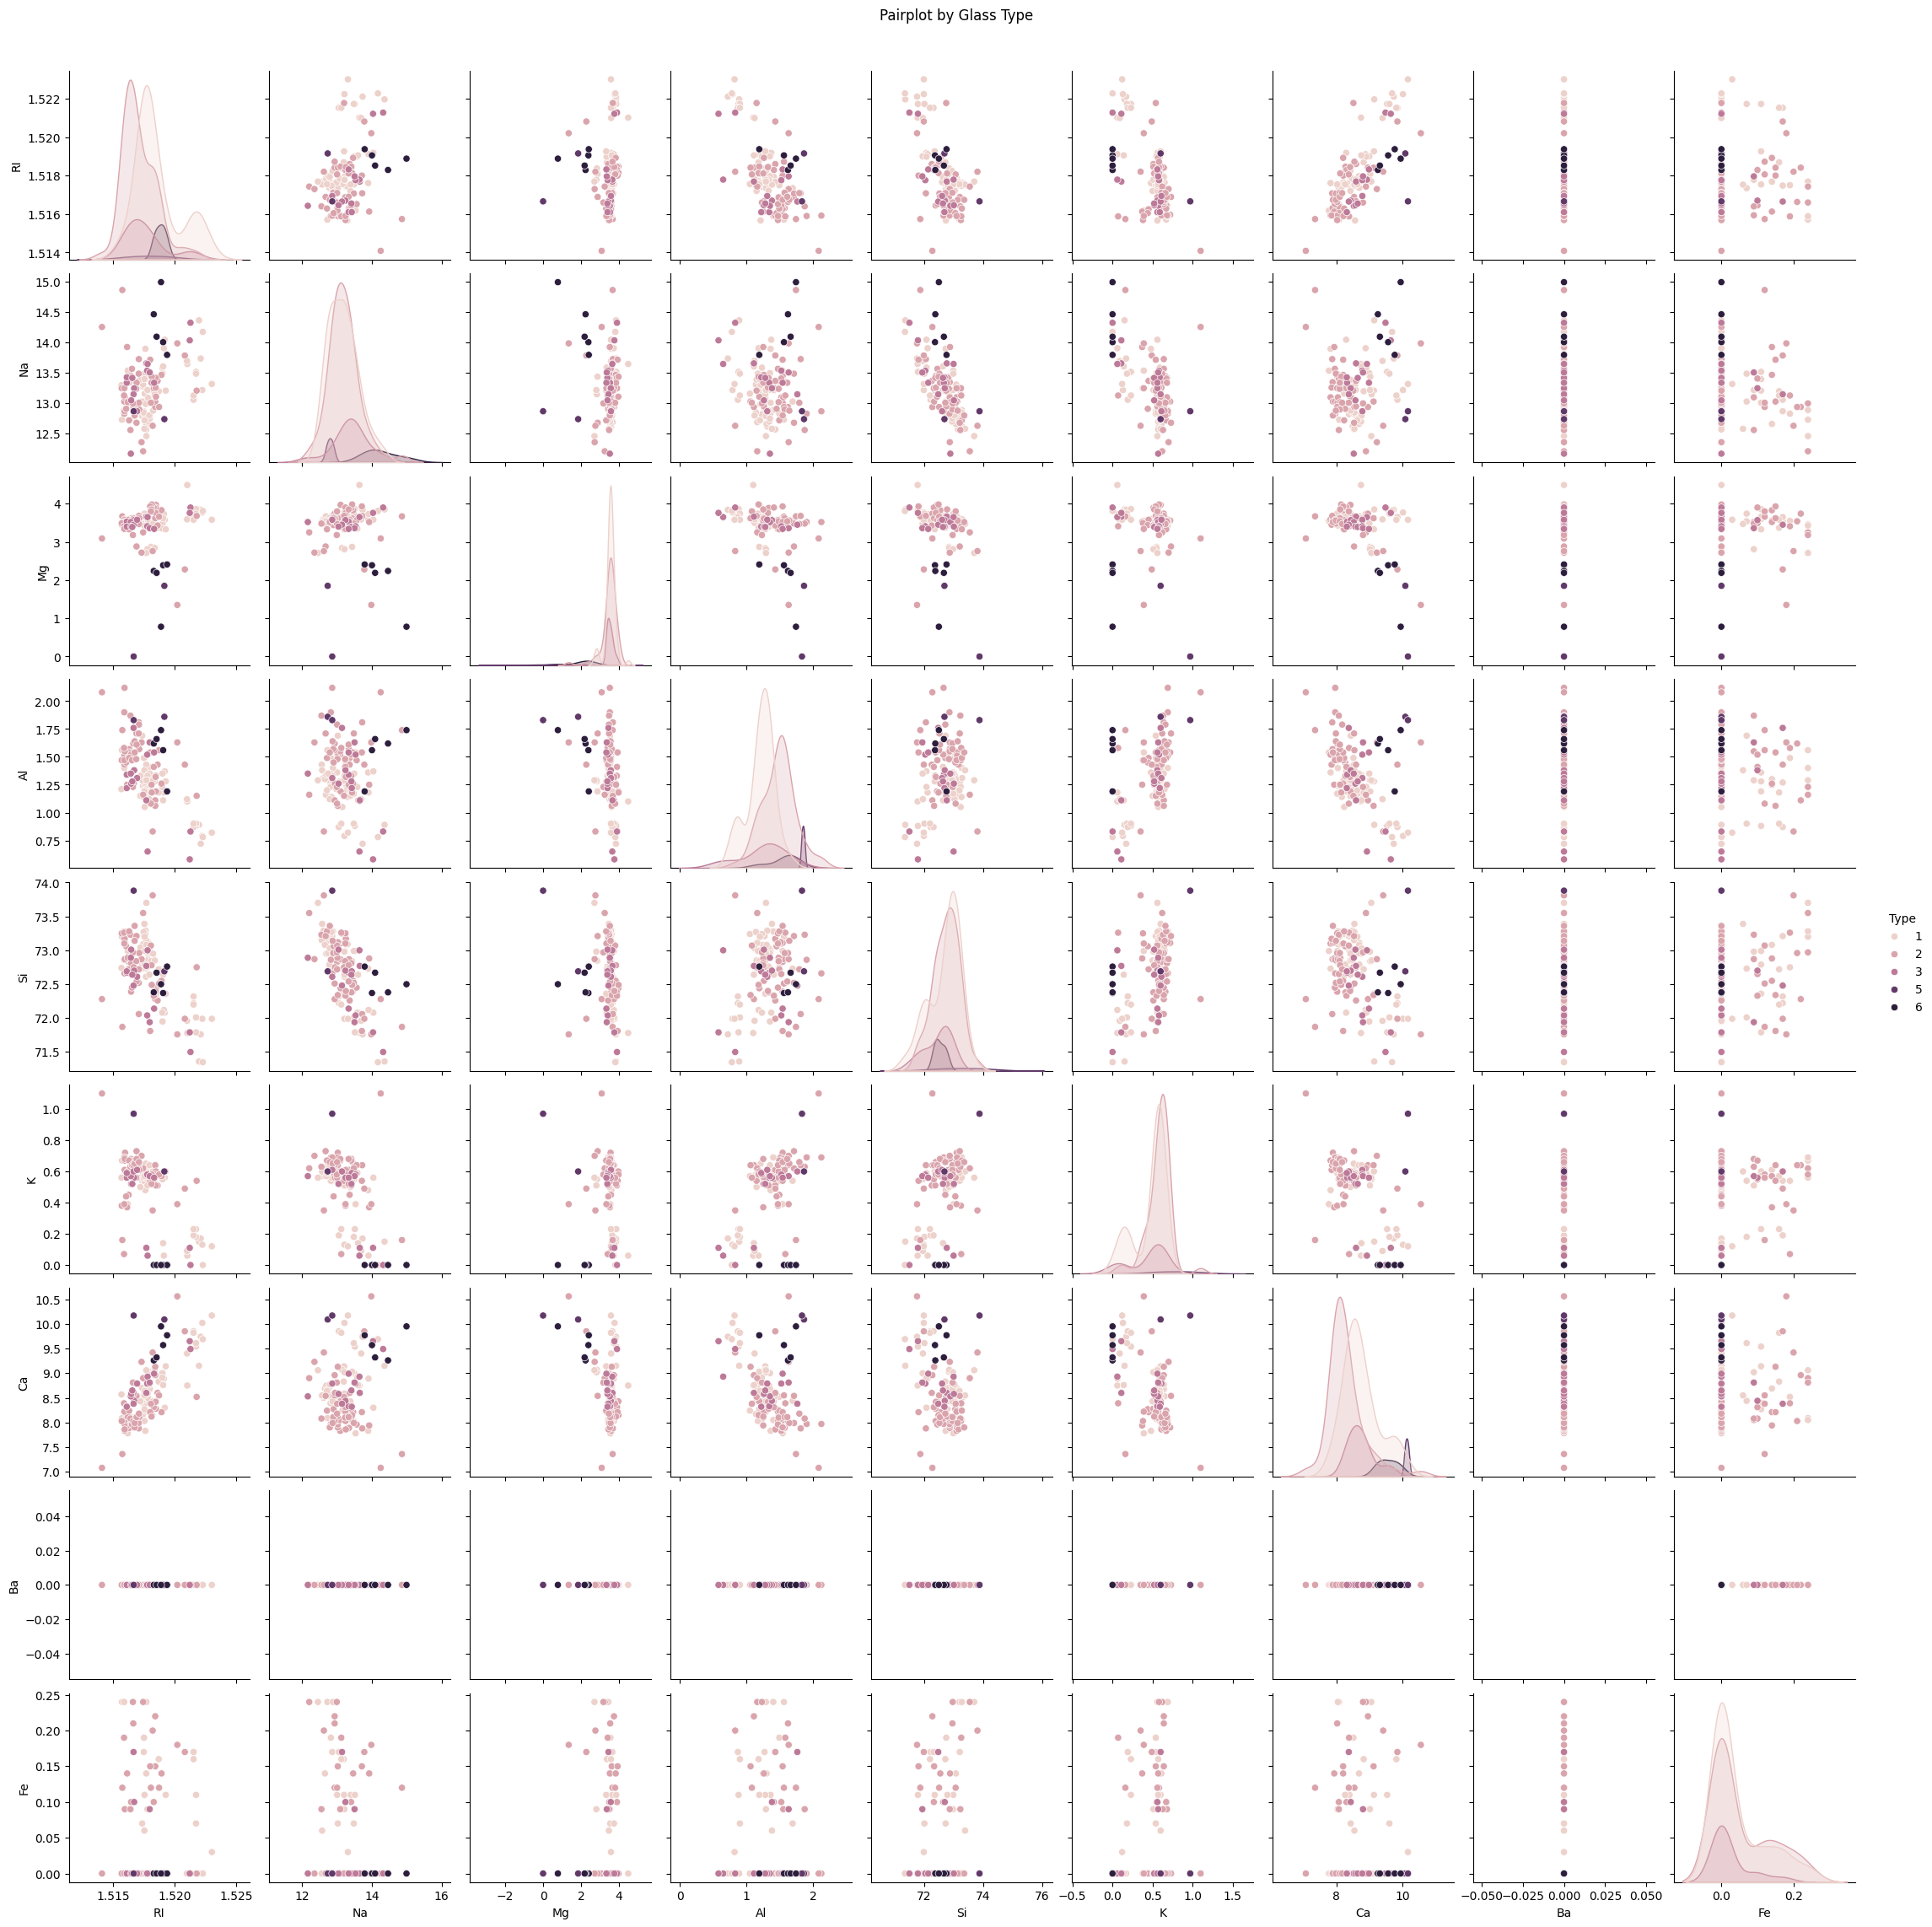

In [55]:
sns.pairplot(dfn, hue='Type', diag_kind='kde')
plt.suptitle('Pairplot by Glass Type', y=1.02)
plt.show()

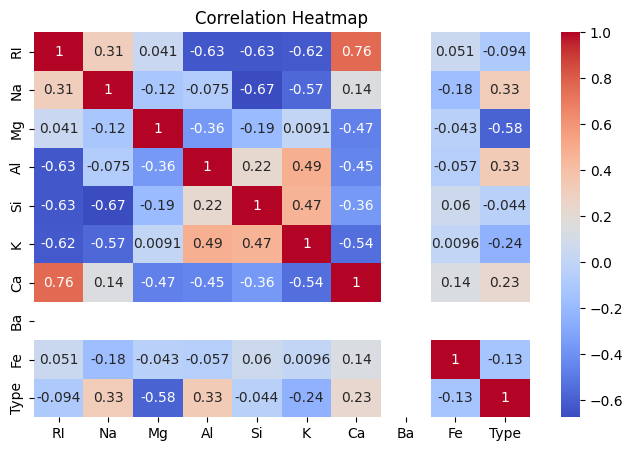

In [56]:
plt.figure(figsize=(8,5))
sns.heatmap(dfn.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

***Analyze any patterns or correlations observed in the data:-***

The strongest relationship in the dataset is between the refractive index (RI) and calcium (Ca), which are positively correlated. This means that as the calcium content increases, the refractive index also tends to increase.

In contrast, RI has a strong negative correlation with aluminum (Al), silicon (Si), and potassium (K). So, higher concentrations of these elements tend to be associated with lower RI values. Additionally, calcium shows moderate negative correlations with magnesium (Mg), aluminum, silicon, and potassium. This suggests that samples with higher calcium content usually have lower levels of these other elements.

Looking at negative correlations, sodium (Na) and silicon (Si) stand out with a strong negative relationship, indicating glasses with more sodium typically have less silicon. Magnesium and calcium also have a moderate negative correlation, hinting at an inverse relationship between their amounts in the glass.

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfn.drop('Type', axis=1))

In [58]:
X = dfn.drop('Type', axis=1)
y = dfn['Type']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
rf_clf = RandomForestClassifier(random_state=42)

In [61]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
y_pred = rf_clf.predict(X_test)

In [63]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred, average='weighted'))
print("Recall:",recall_score(y_test, y_pred, average='weighted'))
print("F1-score:",f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.6829268292682927
Precision: 0.611589950485971
Recall: 0.6829268292682927
F1-score: 0.6394621638524077


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.75      0.77        20
           2       0.62      0.87      0.72        15
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.68        41
   macro avg       0.28      0.32      0.30        41
weighted avg       0.61      0.68      0.64        41



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(random_state=42),n_estimators=10,random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bag = bagging_clf.predict(X_test)
print("Bagging Classifier Performance:")
print(classification_report(y_test, y_pred_bag))

Bagging Classifier Performance:
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        20
           2       0.65      0.87      0.74        15
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.71        41
   macro avg       0.29      0.33      0.31        41
weighted avg       0.63      0.71      0.66        41



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
boosting_clf = GradientBoostingClassifier(random_state=42)
boosting_clf.fit(X_train, y_train)
y_pred_boost = boosting_clf.predict(X_test)
print("Boosting Classifier Performance:")
print(classification_report(y_test, y_pred_boost))

Boosting Classifier Performance:
              precision    recall  f1-score   support

           1       0.89      0.80      0.84        20
           2       0.68      0.87      0.76        15
           3       0.67      0.50      0.57         4
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.78        41
   macro avg       0.65      0.63      0.64        41
weighted avg       0.77      0.78      0.77        41



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# INTERVIEW QUESTIONS

# 1. Explain Bagging and Boosting methods. How is it different from each other.

# Bagging
 Here, we train many models independently and in parallel on different random samples of the data. Each model has equal say, and their predictions are combined by averaging or voting. Bagging mainly reduces variance and helps avoid overfitting. Random Forest is a classic example.

# Boosting
  This trains models sequentially, with each new model learning from the errors of the previous ones. It focuses more on correcting mistakes, reducing bias and often variance too, to improve accuracy. Models are weighted by how well they perform. AdaBoost and Gradient Boosting are well-known examples.


 * Bagging trains models independently and averages them to reduce variance, while Boosting trains models one after another to correct errors, reducing bias with a risk of overfitting*

# 2. Explain how to handle imbalance in the data.

Dealing with class imbalance is crucial because if some classes have way fewer examples than others, models tend to ignore them. Common ways to handle imbalance include:

Algorithmic approaches: Use models that account for imbalance, like class-weighted loss functions.

Evaluation: Use metrics like precision, recall, and F1-score rather than accuracy alone.